# DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP 

## TASK 1 - PREDICTION USING SUPERVISED ML 
### AUTHOR - P.SAI LIKHITHA

In [1]:
#IMPORTING REQUIRED LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

In [2]:
dataset = "http://bit.ly/w-data"
df = pd.read_csv(dataset)           #reading data using pd.read_csv()
print("Data imported successfully")

Data imported successfully


### UNDERSTANDING DATA

In [3]:
df.head(5)                          #to view first 5 rows of the dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape                            #to find dimensions of the dataset.

(25, 2)

In [5]:
df.describe()                       #to view some basic statistical details like percentile, mean, std etc. 

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.info()                           #to view information of the dataset including the index dtype and column dtypes and 
                                    #we can check if there are any null values.Since there are no null values, 
                                    #we can proceed further.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### FINDING RELATIONSHIP BETWEEN THE DATA

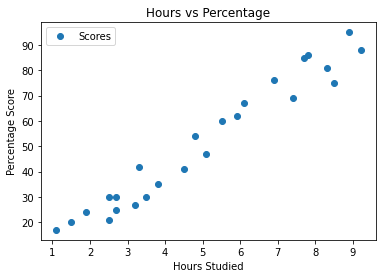

In [7]:
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### There is a positive linear relation between the number of hours studied and percentage of score. As the number of hours increase, scores also increase.

### PREPARING THE DATA

In [8]:
x = df.iloc[:, :-1].values           #independent variable - hours
y = df.iloc[:, 1].values             #dependent variable - scores

In [9]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

#taking 80% data as train dataset and 20% as test dataset.

### TRAINING THE ALGORITHM 

In [11]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 
print('MODEL TRAINED')

MODEL TRAINED


### PLOTTING REGRESSION LINE AND TEST DATA 

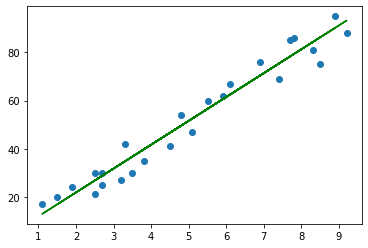

In [12]:
line = regressor.coef_*x+regressor.intercept_
plt.scatter(x, y)
plt.plot(x, line,color='Green');
plt.show()

### MAKING PREDICTIONS

In [13]:
print(x_test)                           
y_pred = regressor.predict(x_test)       

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### COMPARING ACTUAL VS PREDICTED 

In [14]:
prediction=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
prediction

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


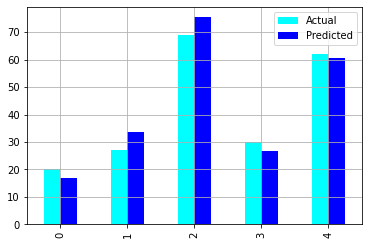

In [16]:
prediction.plot(kind='bar',color=('cyan','blue'))
plt.grid(True)

### PREDICTED SCORE IF A STUDENT STUDIES 9.25 HRS/DAY

In [17]:
result = regressor.predict([[9.25]])
print("Predicted Score = ", result[0])

Predicted Score =  93.69173248737538


In [18]:
#According to the linear regression model, a student is likely to score 93.69% if he/she studies for 9.25 hrs/day

### EVALUATING THE MODEL 

In [19]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
#Mean absolute error is an arithmetic average of absolute errors between y_test and y_pred

Mean Absolute Error: 4.183859899002975
